## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """

    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.3,0.5]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drp in Dropout_EXP:
    
    keras.backend.clear_session() # clear old graph
    print("Experiment with dropout rate = " + str(drp))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp = "dropout rate = " + str(drp)
    results[exp] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

Experiment with dropout rate = 0.1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)     

Epoch 46/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.1381 - accuracy: 0.5946 - val_loss: 1.2971 - val_accuracy: 0.5389
Epoch 47/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.1284 - accuracy: 0.6012 - val_loss: 1.3031 - val_accuracy: 0.5365
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.1189 - accuracy: 0.6021 - val_loss: 1.3000 - val_accuracy: 0.5365
Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.1120 - accuracy: 0.6050 - val_loss: 1.2995 - val_accuracy: 0.5389
Epoch 50/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.1059 - accuracy: 0.6059 - val_loss: 1.2796 - val_accuracy: 0.5438
Experiment with dropout rate = 0.3
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_____

Epoch 41/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4022 - accuracy: 0.4998 - val_loss: 1.3563 - val_accuracy: 0.5159
Epoch 42/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3985 - accuracy: 0.5017 - val_loss: 1.3457 - val_accuracy: 0.5178
Epoch 43/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3926 - accuracy: 0.5034 - val_loss: 1.3524 - val_accuracy: 0.5154
Epoch 44/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3834 - accuracy: 0.5056 - val_loss: 1.3476 - val_accuracy: 0.5185
Epoch 45/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3775 - accuracy: 0.5078 - val_loss: 1.3442 - val_accuracy: 0.5179
Epoch 46/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3721 - accuracy: 0.5119 - val_loss: 1.3383 - val_accuracy: 0.5222
Epoch 47/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3663 - accuracy: 0.5122

Epoch 36/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6615 - accuracy: 0.4026 - val_loss: 1.5349 - val_accuracy: 0.4514
Epoch 37/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6585 - accuracy: 0.4035 - val_loss: 1.5384 - val_accuracy: 0.4529
Epoch 38/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6551 - accuracy: 0.4069 - val_loss: 1.5315 - val_accuracy: 0.4533
Epoch 39/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6436 - accuracy: 0.4089 - val_loss: 1.5149 - val_accuracy: 0.4579
Epoch 40/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6446 - accuracy: 0.4084 - val_loss: 1.5154 - val_accuracy: 0.4617
Epoch 41/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6419 - accuracy: 0.4121 - val_loss: 1.5185 - val_accuracy: 0.4560
Epoch 42/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6281 - accuracy: 0.4149

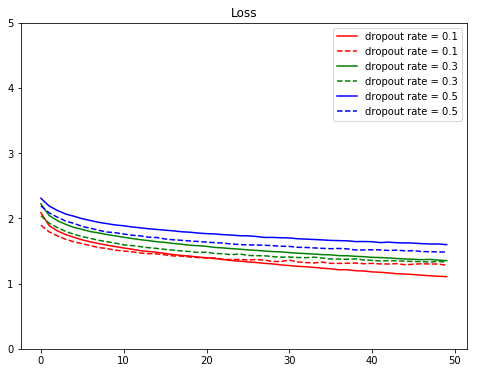

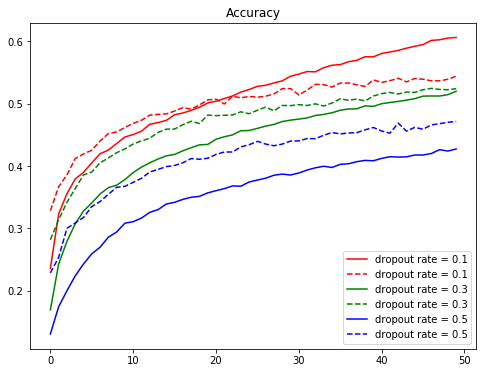

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
drp = 0.1   

keras.backend.clear_session() # clear old graph
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 9s 173us/step - loss: 1.1551 - accuracy: 0.5824 - val_loss: 1.3547 - val_accuracy: 0.5236
Epoch 47/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.1526 - accuracy: 0.5824 - val_loss: 1.3426 - val_accuracy: 0.5248
Epoch 48/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.1514 - accuracy: 0.5835 - val_loss: 1.3362 - val_accuracy: 0.5341
Epoch 49/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.1305 - accuracy: 0.5903 - val_loss: 1.3413 - val_accuracy: 0.5291
Epoch 50/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.1349 - accuracy: 0.5914 - val_loss: 1.3581 - val_accuracy: 0.5227


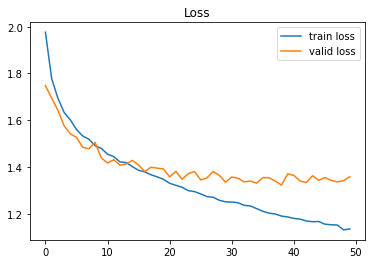

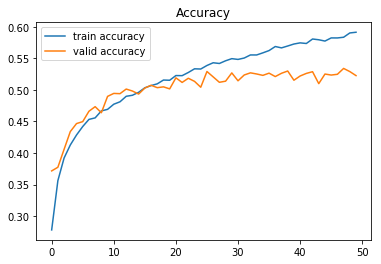

In [11]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()